# Imports

In [56]:
import cv2
import imgaug as ia
import imgaug.augmenters as iaa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import glob

# Preprocessing 'characters'


In [57]:
"""
Handling the labels
"""
# Reading labels
labels = pd.read_csv('characters/english.csv')
labels.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [58]:
# Unique labels
unique = labels.label.unique()
print(unique)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [59]:
# Create a dictonary with the unique labels
label_dict = {k:v for v,k in enumerate(unique)}
print(label_dict)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}


In [60]:
# Rename the labels
labels['label'] = labels['label'].apply(lambda x: label_dict[x])
labels.head()


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [61]:
# Unique labels
unique = labels.label.unique()
print(unique)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


In [62]:
"""
Handling the images
"""

# Read images
images = []
for i in range(len(labels)):
    img = cv2.imread('characters/' + labels.iloc[i]['image'])
    images.append(img)
images = np.array(images)
print(images.shape)

(3410, 900, 1200, 3)


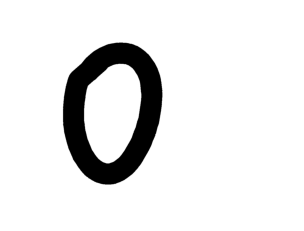

In [63]:
# Function that plots a single image
def plot_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

plot_image(images[0])



In [64]:
# Resize the images to 128x128
images_resized = []
for image in images:
    image_resized = cv2.resize(image, (128, 128))
    images_resized.append(image_resized)
images_resized = np.array(images_resized)
print(images_resized.shape)

(3410, 128, 128, 3)


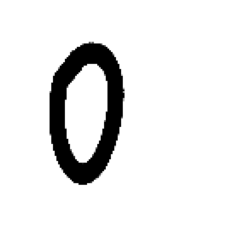

In [65]:
plot_image(images_resized[0])

In [66]:
# Threshold images
images_thresholded = []
for image in images_resized:
    new_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]
    images_thresholded.append(new_image)

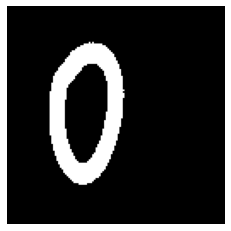

In [67]:
plot_image(images_thresholded[0])


In [68]:
to_be_augmented = images_thresholded

## Augmenting

In [69]:
# Function to write image to dictionary
def write_image(writing_image, index):
    #writing_image = writing_image / 255.0 # Normalizing
    cv2.imwrite('augmented/images/' + str(index) + '.jpg', writing_image)

# Creating dictionaries
if os.path.exists("augmented"):
    shutil.rmtree("augmented")
os.mkdir("augmented")
os.mkdir("augmented/images")


"""
Aaugmenting images
"""
labels_v1 = labels["label"].values

# For each image apply gaussian blur
labels_v2 = []
count = 0
for image, label in zip(to_be_augmented, labels_v1):

    # Save original image
    write_image(image, count)
    labels_v2.append(label)
    count += 1

    # Apply gaussian blur using imgaug
    image_aug = iaa.GaussianBlur(sigma=(2.0, 6.0))(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply gaussian noise using imgaug
    image_aug = iaa.AdditiveGaussianNoise(scale=(0, 0.2*255), per_channel=True)(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply rotation using imgaug
    image_aug = iaa.Affine(rotate=(-70, -20))(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

     # Apply rotation using imgaug
    image_aug = iaa.Affine(rotate=(20, 70))(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply white cutout using imgaug
    image_aug = iaa.Cutout(fill_mode="constant", size=(0.02, 0.2), cval=255)(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1


    # Apply scale using imgaug
    image_aug = iaa.Affine(scale=(1.3, 2.0))(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply padding using imgaug
    image_aug = iaa.Pad(px=(10, 30))(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale using imgaug
    image_aug = iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply rotation and shear using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(rotate=(-40, 40)),
        iaa.Affine(shear=(-20, 20))
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply white cutout and rotation using imgaug
    image_aug = iaa.Sequential([
        iaa.Cutout(fill_mode="constant", size=(0.02, 0.2), cval=255),
        iaa.Affine(rotate=(-40, 40))
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1


    # Apply gaussian noise and rotation using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(rotate=(-40, 40)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.2*255), per_channel=True),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1


    # Apply gaussian noise and shear using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(shear=(-40, 40)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.2*255), per_channel=True),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale and shear using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Affine(shear=(-40, 40))
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1


    # Apply scale, rotation, and gauusian blur using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Affine(rotate=(-40, 40)),
        iaa.GaussianBlur(sigma=(2.0, 6.0)),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale, shear, rotation, and gauusian blur using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Affine(shear=(-40, 40)),
        iaa.Affine(rotate=(-40, 40)),
        iaa.GaussianBlur(sigma=(2.0, 6.0)),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale, shear, rotation blur using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Affine(shear=(-40, 40)),
        iaa.GaussianBlur(sigma=(2.0, 6.0)),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply gaussian noise and scale using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.2*255), per_channel=True),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale, rotation, and gaussian noise using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Affine(rotate=(-40, 40)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.2*255), per_channel=True),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale, shear and gaussian noise using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Affine(shear=(-40, 40)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.2*255), per_channel=True),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale, shear, rotation, and gaussian noise using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Affine(shear=(-40, 40)),
        iaa.Affine(rotate=(-40, 40)),
        iaa.AdditiveGaussianNoise(scale=(0, 0.2*255), per_channel=True),
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale and padding using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Pad(px=(10, 30))
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1

    # Apply scale and rotation using imgaug
    image_aug = iaa.Sequential([
        iaa.Affine(scale=(1, 2.0)),
        iaa.Affine(rotate=(-40, 40))
    ])(image=image)
    write_image(image_aug, count)
    labels_v2.append(label)
    count += 1


# Preprocessing 'Fnt'

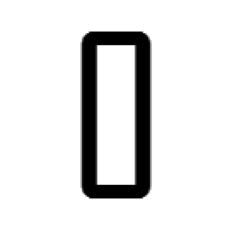

(128, 128, 3)


In [71]:
# Read one image from Fnt and display it
test_image = cv2.imread("Fnt/Sample001/img001-00001.png")
plot_image(test_image)
print(test_image.shape)


In [72]:
# Read directory paths in 'Fnt'
dir_paths = glob.glob("Fnt/*")

# Make sure its sorted
dir_paths.sort(reverse=False)

for label, dir_path in enumerate(dir_paths):
    # Read image paths in directory
    image_paths = glob.glob(dir_path + "/*.png")

    for image_path in image_paths:
        # Read image
        image = cv2.imread(image_path)

        # Resize image
        #image = cv2.resize(image, (128, 128)) # They are already 128x128

        # Threshold image
        image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]

        # Save image
        write_image(image, count)
        labels_v2.append(label)
        count += 1



In [73]:
# Write labels to csv
labels_v3 = pd.DataFrame({"label": labels_v2})
labels_v3.to_csv("augmented/labels.csv", index=False)
